### Sample visualisation exercise

In [2]:
# import numpy and pandas library
import numpy as np
import pandas as pd

# seaborn and matplotlib libraries for plotting some of the visualisations
import seaborn as sns
import matplotlib.pyplot as plt

# read in the datafile
disease_df = pd.read_csv('gi_disease_effects.csv',encoding='ISO-8859-1')


In [3]:
# visualise the dataset and check if the data has been properly read
disease_df.head()


,Year,Month,Day,Country,Region,State,City,Latitude,Longitude,success,crtical,crticaltype1,DiseaseType,StudyBy,StudyBy.1,Death,Serious,Extreme
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,1,GERD,58.0,Dominican Republic,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,NaN,Mexico city,19.432608,-99.133207,1,0,6,Cellac,21.0,Belgium,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,0,1,GERD,217.0,United States,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.983773,23.728157,1,0,3,Ulcerative Colitis,217.0,United States,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,NaN,Fukouka,33.580412,130.396361,1,0,7,Gastrointestinal Bleeding,217.0,United States,NaN,NaN,NaN


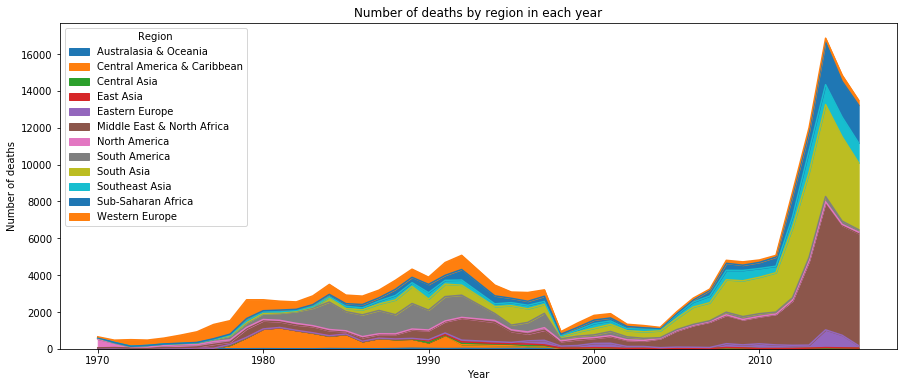

In [4]:
# compute a cross tabulation of number of deaths by region
pd.crosstab(disease_df.Year, disease_df.Region).plot(kind='area',figsize=(15,6))
plt.title('Number of deaths by region in each year')
plt.ylabel('Number of deaths')
plt.show()

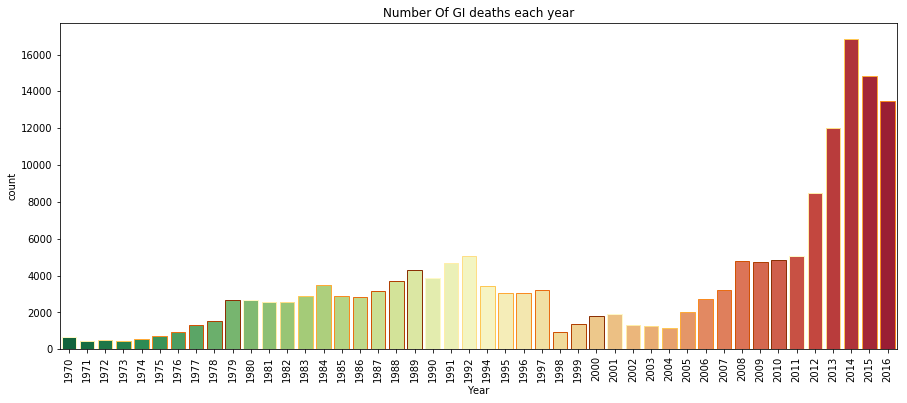

In [5]:
# compute the number of deaths over years
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=disease_df,palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=90)
plt.title('Number Of GI deaths each year')
plt.show()

In [6]:
# compute the distribution of deaths for top  countries over years due to GI health disease
disease_df['Serious'] = disease_df['Serious'].fillna(0).astype(int)
disease_df['Death'] = disease_df['Death'].fillna(0).astype(int)

# 'DeathSerious' column calculates the total affected people.
disease_df['DeathSerious'] = disease_df['Serious'] + disease_df['Death']


disease_df_1 = disease_df.sort_values(by='DeathSerious',ascending=False)[:40]
heat=disease_df_1.pivot_table(index='Country',columns='Year',values='DeathSerious')
heat.fillna(0,inplace=True)

In [7]:
# Use plotly for interactive viewing

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#00BEFF'],  [.6, '#8856a7'],  [1, '#810f7M']]
heatmap = go.Heatmap(z=heat.as_matrix(), x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 40 worst affected in history from year 1982 to year 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

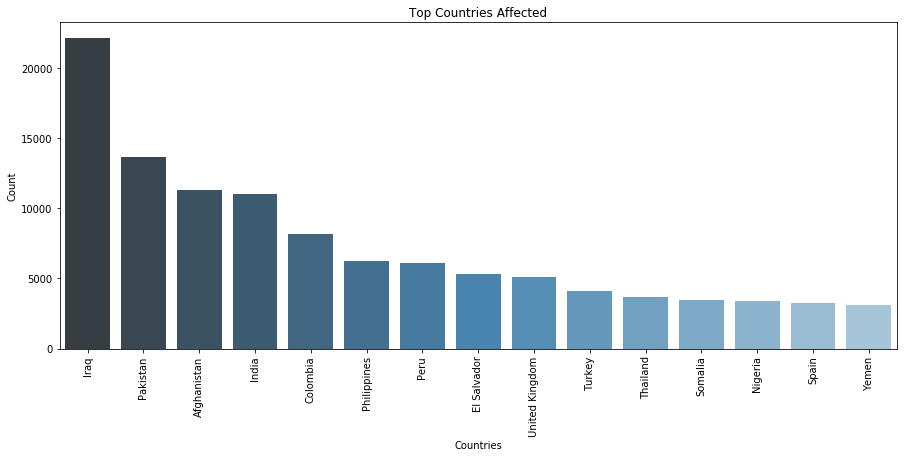

In [8]:
# Plot the top 16 countries affected
plt.subplots(figsize=(15,6))
sns.barplot(disease_df['Country'].value_counts()[:15].index,disease_df['Country'].value_counts()[:15].values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

In [9]:
disease_bubble_df = disease_df[(disease_df['DiseaseType'] != 'Unknown') & (disease_df['DeathSerious'] > 50)]
disease_bubble_df.head()

,Year,Month,Day,Country,Region,State,City,Latitude,Longitude,success,crtical,crticaltype1,DiseaseType,StudyBy,StudyBy.1,Death,Serious,Extreme,DeathSerious
1199,1972,3,4,United Kingdom,Western Europe,Northern Ireland,Belfast,54.597269,-5.930109,1,0,3,Ulcerative Colitis,233.0,Northern Ireland,2,130,NaN,132
1201,1972,3,6,United Kingdom,Western Europe,Northern Ireland,Belfast,54.597267,-5.925849,1,0,3,Ulcerative Colitis,233.0,Northern Ireland,0,56,0.0,56
1313,1972,5,30,Israel,Middle East & North Africa,Central,Lod,32.004361,34.888229,1,0,3,Ulcerative Colitis,97.0,Israel,26,72,NaN,98
1341,1972,6,15,South Vietnam,Southeast Asia,NaN,Pleiku,13.977956,108.002298,1,0,3,Ulcerative Colitis,89.0,Hong Kong,81,0,NaN,81
1716,1973,3,8,United Kingdom,Western Europe,England,London,51.500152,-0.126236,1,0,3,Ulcerative Colitis,216.0,Great Britain,1,238,NaN,239


In [10]:
disease_bubble_df = disease_bubble_df.sort_values(['Region', 'Country'])
disease_bubble_df.isnull().sum()

Year              0
Month             0
Day               0
Country           0
Region            0
State           149
City              1
Latitude         72
Longitude        72
success           0
crtical           0
crticaltype1      0
DiseaseType       0
StudyBy           7
StudyBy.1         7
Death             0
Serious           0
Extreme         667
DeathSerious      0
dtype: int64

In [11]:
disease_bubble_df = disease_bubble_df.drop(['Latitude','Longitude'],axis=1)

In [12]:
# Interactive Bubble chart showing the timeline as well as the details like number of affected people, year and the city.

hover_text = []
for index, row in disease_bubble_df.iterrows():
    hover_text.append(('City: {city}<br>'+
                      'DiseaseType: {diseasetype}<br>'+
                      'Affected: {death}<br>'+
                      'Year: {year}').format(city=row['City'],
                                            diseasetype=row['DiseaseType'],
                                            death=row['DeathSerious'],
                                            year=row['Year']))
disease_bubble_df['text'] = hover_text

trace0 = go.Scatter(
    x=disease_bubble_df['Year'][disease_bubble_df['Country'] == 'Iraq'],
    y=disease_bubble_df['DeathSerious'][disease_bubble_df['Country'] == 'Iraq'],
    mode='markers',
    name='Iraq',
    text=disease_bubble_df['text'][disease_bubble_df['Country'] == 'Iraq'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=disease_bubble_df['DeathSerious'][disease_bubble_df['Country'] == 'Iraq'],
        line=dict(
            width=2
        ),
    )
)
trace1 = go.Scatter(
    x=disease_bubble_df['Year'][disease_bubble_df['Country'] == 'Pakistan'],
    y=disease_bubble_df['DeathSerious'][disease_bubble_df['Country'] == 'Pakistan'],
    mode='markers',
    name='Pakistan',
    text=disease_bubble_df['text'][disease_bubble_df['Country'] == 'Pakistan'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=disease_bubble_df['DeathSerious'][disease_bubble_df['Country'] == 'Pakistan'],
        line=dict(
            width=2
        ),
    )
)
trace2 = go.Scatter(
    x=disease_bubble_df['Year'][disease_bubble_df['Country'] == 'Afghanistan'],
    y=disease_bubble_df['DeathSerious'][disease_bubble_df['Country'] == 'Afghanistan'],
    mode='markers',
    name='Afghanistan',
    text=disease_bubble_df['text'][disease_bubble_df['Country'] == 'Afghanistan'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=disease_bubble_df['DeathSerious'][disease_bubble_df['Country'] == 'Afghanistan'],
        line=dict(
            width=2
        ),
    )
)
trace3 = go.Scatter(
    x=disease_bubble_df['Year'][disease_bubble_df['Country'] == 'India'],
    y=disease_bubble_df['DeathSerious'][disease_bubble_df['Country'] == 'India'],
    mode='markers',
    name='India',
    text=disease_bubble_df['text'][disease_bubble_df['Country'] == 'India'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=disease_bubble_df['DeathSerious'][disease_bubble_df['Country'] == 'India'],
        line=dict(
            width=2
        ),
    )
)

# bubble size corresponds to the number of affected individuals
data = [trace0, trace1, trace2, trace3]
layout = go.Layout(
         title = 'Effects on Iraq, Afghanistan, Pakistan and India',
         xaxis = dict(
             title = 'Year',
             #type = 'log',
             range = [1976,2016],
             tickmode = 'auto',
             nticks = 30,
             showline = True,
             showgrid = False
             ),
         yaxis = dict(
             title = 'Death/Serious Condition',
             type = 'log',
             range = [1.8,3.6],
             tickmode = 'auto',
             nticks = 40,
             showline = True,
             showgrid = False),
         paper_bgcolor='rgb(243, 243, 243)',
         plot_bgcolor='rgb(243, 243, 243)',
         )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Disease Bubble')



In [16]:
# Countries affected most from 70's till 2016 - Choropleth map using folium tool

import json
import os
world_geo = os.path.join('./world-countries', 'world-countries.json')
disease_df_world = disease_df[['Country','DeathSerious']]
disease_df_world = disease_df_world.groupby(['Country'])['DeathSerious'].sum().sort_values(ascending=False) \
.reset_index()

# Get the folium module for geographical plotting
import folium
from folium.plugins import MarkerCluster
m2 = folium.Map(location=[0, 0],zoom_start=2,tiles='Mapbox Bright')
m2.choropleth(
    geo_path=world_geo,
    data=disease_df_world,
    columns=['Country','DeathSerious'],
    key_on='feature.properties.name',
    threshold_scale=[0,15000, 40000, 100000, 150000, 200600],
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Affected population numbers from 1970 to 2016'
)
folium.LayerControl().add_to(m2)

# show the map 
m2